In [21]:
#Import dependencies

import pandas as pd
import numpy as np

import requests
import matplotlib.pyplot as plt
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy

import json

In [22]:
#File to put in data results
results_data_file = "output_data/results_data_file.csv"

In [23]:
#Generating Citities List

#list for holding latitude, longitude, and cities
city_lat_longs = []
cities = []

#Creating latitude and longitude combinations
city_lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
city_long = np.random.uniform(low=-180.000, high=180.000, size=1500)
city_lats_longs = zip(city_lat, city_long)


#Get city with latitude and longitude combinations
for city_lat_long in city_lats_longs:
    city = citipy.nearest_city(city_lat_long[0], city_lat_long[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Finding length of cities to make sure it meets the 500+ minimum
#len(cities)

In [24]:
#API Calling to get Open Weather Map data

# Building URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

query_url = f"{url}units={units}&appid={weather_api_key}&q="
    
    
#Holding list for latitude, longitidue, temperature, humidity, clouds,
#wind, country, and date information for city DataFrame
city_data_info = []

#Printing log start of Data Retrieval
print('''Beginning Data Retrieval
----------------------------------''')

#Create index counter to keep track of city count
index_count = 1

#Look through cities in cities list
for i, city in enumerate(cities):

    #Building URL endpoint with each city
    city_data_url = query_url + city

    #Printing logging index of each city and city name
    print(f"Processing Index record {index_count} | {city}")
    print(city_data_url)

    #Adding to index counter
    index_count += 1
    
    #Make API request for each cities even if data isn't there by 
    #using try and except
    try:
        #Retrieving data and converting it into JSON
        city_data_weather = requests.get(city_data_url).json()
        
        #Retrieving specific data regarding latitude, longitude, temperature, humidity
        #clouds, wind, country, and date within JSON object
        latitude_data = city_data_weather['coord']['lat']
        longitude_data = city_data_weather['coord']['lon']
        temperature_data = city_data_weather['main']['temp_max']
        humidity_data = city_data_weather['main']['humidity']
        clouds_data = city_data_weather['clouds']['all']
        wind_data = city_data_weather['wind']['speed']
        country_data = city_data_weather['sys']['country']
        date_data = city_data_weather['dt']
        
        #Add data gathered to city_data_info list
        city_data_info.append({"City": city,
                               "Latitude" : latitude_data,
                               "Longitude" : longitude_data,
                               "Maximum Temperature" : temperature_data,
                               "Humidity": humidity_data,
                               "Cloudiness" : clouds_data,
                               "Wind Speed" : wind_data,
                               "Country" : country_data,
                               "Date" : date_data              
                              })
        
    #Skipping a city that does not have data
    except:
        print("City not found. Skipping...")
            
#Printing log end of Data Retrieval
print('''----------------------------------
Data Retrieval Complete
----------------------------------''')
        
    

Beginning Data Retrieval
----------------------------------
Processing Index record 1 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=khatanga
Processing Index record 2 | rondonopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=rondonopolis
Processing Index record 3 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=amderma
City not found. Skipping...
Processing Index record 4 | noumea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=noumea
Processing Index record 5 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=punta arenas
Processing Index record 6 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=rikitea
Processing

Processing Index record 54 | sao gabriel da cachoeira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=sao gabriel da cachoeira
Processing Index record 55 | yanan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=yanan
City not found. Skipping...
Processing Index record 56 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=norman wells
Processing Index record 57 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=nizhneyansk
City not found. Skipping...
Processing Index record 58 | chifeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=chifeng
Processing Index record 59 | varkkallai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=varkkallai
Pr

Processing Index record 108 | grand river south east
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=grand river south east
City not found. Skipping...
Processing Index record 109 | balikpapan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=balikpapan
Processing Index record 110 | mahon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=mahon
Processing Index record 111 | rastolita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=rastolita
Processing Index record 112 | antofagasta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=antofagasta
Processing Index record 113 | abha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=abha
Processing Index record 114 | nouadhibou

Processing Index record 162 | black river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=black river
Processing Index record 163 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=airai
Processing Index record 164 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=sioux lookout
Processing Index record 165 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=tiksi
Processing Index record 166 | shelburne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=shelburne
Processing Index record 167 | magistralnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=magistralnyy
Processing Index record 168 | vestmannaeyjar
http://api.openweathermap.org/data/

Processing Index record 216 | nata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=nata
Processing Index record 217 | asau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=asau
Processing Index record 218 | tidore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=tidore
City not found. Skipping...
Processing Index record 219 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=chokurdakh
Processing Index record 220 | avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=avera
Processing Index record 221 | de aar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=de aar
Processing Index record 222 | goulburn
http://api.openweathermap.org/data/2.5/weather?units=

Processing Index record 271 | margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=margate
Processing Index record 272 | riyadh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=riyadh
Processing Index record 273 | vanavara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=vanavara
Processing Index record 274 | whitehorse
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=whitehorse
Processing Index record 275 | prince rupert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=prince rupert
Processing Index record 276 | yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=yulara
Processing Index record 277 | rolim de moura
http://api.openweathermap.org/data/2.5/weathe

Processing Index record 325 | itoman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=itoman
Processing Index record 326 | pangody
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=pangody
Processing Index record 327 | fort abbas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=fort abbas
Processing Index record 328 | caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=caravelas
Processing Index record 329 | ulladulla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=ulladulla
Processing Index record 330 | tilichiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=tilichiki
Processing Index record 331 | kulhudhuffushi
http://api.openweathermap.org/data/2.5/weathe

Processing Index record 379 | palembang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=palembang
Processing Index record 380 | the pas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=the pas
Processing Index record 381 | luangwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=luangwa
Processing Index record 382 | barquisimeto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=barquisimeto
Processing Index record 383 | cap-aux-meules
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=cap-aux-meules
Processing Index record 384 | tarakan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=tarakan
Processing Index record 385 | acapulco
http://api.openweathermap.org/data/2.5/

Processing Index record 432 | alice springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=alice springs
Processing Index record 433 | nuevo progreso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=nuevo progreso
Processing Index record 434 | san jose
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=san jose
Processing Index record 435 | rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=rawson
Processing Index record 436 | barcelos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=barcelos
Processing Index record 437 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=leningradskiy
Processing Index record 438 | bridlington
http://api.openweatherma

Processing Index record 486 | viligili
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=viligili
City not found. Skipping...
Processing Index record 487 | katherine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=katherine
Processing Index record 488 | atbasar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=atbasar
Processing Index record 489 | magadan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=magadan
Processing Index record 490 | wanning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=wanning
Processing Index record 491 | nelson bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=nelson bay
Processing Index record 492 | tiarei
http://api.openweathermap.org

Processing Index record 540 | westlock
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=westlock
Processing Index record 541 | mathbaria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=mathbaria
Processing Index record 542 | port-de-paix
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=port-de-paix
City not found. Skipping...
Processing Index record 543 | grafton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=grafton
Processing Index record 544 | vilcun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=vilcun
Processing Index record 545 | kangasala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=kangasala
Processing Index record 546 | taltal
http://api.openweatherm

Processing Index record 594 | shenkursk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=shenkursk
Processing Index record 595 | babol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=babol
Processing Index record 596 | paciran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=paciran
Processing Index record 597 | chitungwiza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=chitungwiza
Processing Index record 598 | tsabong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=tsabong
Processing Index record 599 | saveh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=378db3cec2f8bb3f078e856683f4df4d&q=saveh
Processing Index record 600 | kalabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&app

In [25]:
#Taking results from city data retrieval to a data frame
city_data_info_df = pd.DataFrame(city_data_info)

#Getting Data count to make sure it is equal
city_data_info_df.count()

City                   566
Latitude               566
Longitude              566
Maximum Temperature    566
Humidity               566
Cloudiness             566
Wind Speed             566
Country                566
Date                   566
dtype: int64

In [26]:
#Exporting data from DataFrame into a CVS file

#reference to file
#results_data_file = "output_data/results_data_file.csv"

city_data_info_df.to_csv(results_data_file)


In [27]:
#Creating DataFrame
city_data_info_df = pd.DataFrame(city_data_info)
city_data_info_df.head()

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,khatanga,71.97,102.50,3.58,93,100,10.85,RU,1585714247
1,rondonopolis,-16.47,-54.64,74.84,73,2,1.88,BR,1585714248
2,noumea,-22.28,166.46,84.20,62,20,17.22,NC,1585714248
3,punta arenas,-53.15,-70.92,48.20,76,75,14.99,CL,1585714249
4,rikitea,-23.12,-134.97,79.29,71,100,6.04,PF,1585714249


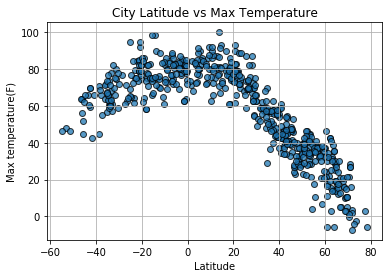

In [28]:
#Latitude vs Temperature Plot

#Plotting with pyplot
#Setting variables for x-axis and y-axis
x_values = city_data_info_df['Latitude']
y_values = city_data_info_df['Maximum Temperature']

#Graphing and showing Lineplot
plt.scatter(x_values,y_values, marker="o", edgecolors="black", alpha=0.75)

#Formatting title and axis labels
plt.title("City Latitude vs Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max temperature(F)')
plt.grid(True)
plt.savefig(f"output_data/fig1.png")
plt.show()

After each plot add a sentence or two explaining what the code is and analyzing.

Getting Latitude and Maximum Temperature data points and comparing
to see if there is a correlation with a scatterplot. Data shows that the closer the latitude is to 0°, the higher the temperature. 


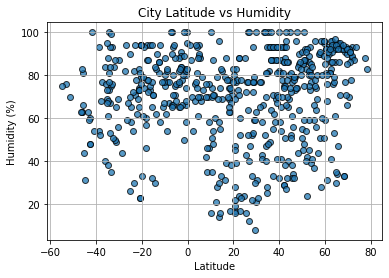

In [29]:
#Latitude vs Humidity Plot

#Plotting with pyplot
#Setting variables for x-axis and y-axis
x_values = city_data_info_df['Latitude']
y_values = city_data_info_df['Humidity']


#Graphing and showing Lineplot
plt.scatter(x_values,y_values, marker="o", edgecolors="black", alpha=0.75)

#Formatting title and axis labels
plt.title("City Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig(f"output_data/fig2.png")
plt.show()

After each plot add a sentence or two explaining what the code is and analyzing.

Getting Latitude and Humidity data points and comparing to see if there is a correlation with a scatterplot. Data shows that there is no correlation visible. 

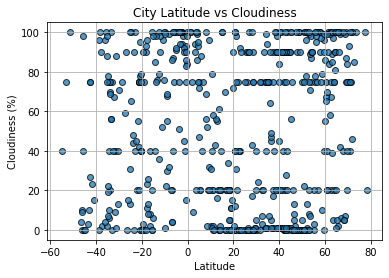

In [30]:
#Latitude vs Cloudiness Plot

#Plotting with pyplot
#Setting variables for x-axis and y-axis
x_values = city_data_info_df['Latitude']
y_values = city_data_info_df['Cloudiness']


#Graphing and showing Lineplot
plt.scatter(x_values,y_values, marker="o", edgecolors="black", alpha=0.75)

#Formatting title and axis labels
plt.title("City Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig(f"output_data/fig3.png")
plt.show()

After each plot add a sentence or two explaining what the code is and analyzing.

Getting Latitude and Cloudiness data points and comparing
to see if there is a correlation. Data shows that there are pockets where there is a maximum percent of cloudiness and zero percent of cloudiness. About 0 percent of clouds were areas with a 20° to 60° latitude range and high maximum cloudiness percent were areas with -20° to 0° and 40° to 70° latitude range.

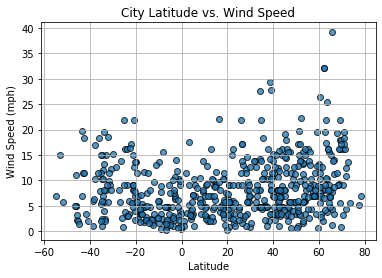

In [31]:
#Latitude vs Wind Speed Plot

#Plotting with pyplot
#Setting variables for x-axis and y-axis
x_values = city_data_info_df['Latitude']
y_values = city_data_info_df['Wind Speed']


#Graphing and showing Lineplot
plt.scatter(x_values,y_values, marker="o", edgecolors="black", alpha=0.75)

#Formatting title and axis labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig(f"output_data/fig4.png")
plt.show()

After each plot add a sentence or two explaining what the code is and analyzing.

Getting Latitude and Wind Speed data points and comparing to see if there is a correlation. Data shows that there is no correlation visible. However there was an outlier for maximum wind speed around 70° latitude for the random data set that included this data point.


In [32]:
#Create Northern and Southern Hemisphere DataFrames for Latitude
northern_df = city_data_info_df.loc[city_data_info_df["Latitude"] >=0]
southern_df = city_data_info_df.loc[city_data_info_df["Latitude"] <0]


The r value is: -0.9249099520878213
The r-squared value is: 0.855458419471096


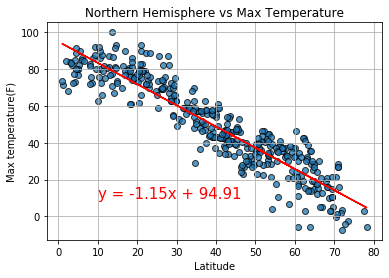

In [33]:
#Northern Hemisphere - Temperature (F) vs. Latitude

#Plotting with pyplot
#Setting variables for x-axis and y-axis
x_values = northern_df['Latitude']
y_values = northern_df['Maximum Temperature']

#Graphing and showing Lineplot
plt.scatter(x_values,y_values, marker="o", edgecolors="black", alpha=0.75)

#Formatting title and axis labels
plt.title("Northern Hemisphere vs Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max temperature(F)')
plt.grid(True)

#Adding the linear regression equation and line to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")

# Print r square value
print(f"The r value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")

plt.savefig(f"output_data/fig5.png")
plt.show()


The r value is: 0.606596440210913
The r-squared value is: 0.3679592412765517


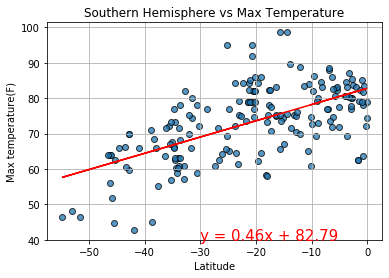

In [34]:
#Southern Hemisphere - Temperature (F) vs. Latitude

#Plotting with pyplot
#Setting variables for x-axis and y-axis
x_values = southern_df['Latitude']
y_values = southern_df['Maximum Temperature']


#Graphing and showing Lineplot
plt.scatter(x_values,y_values, marker="o", edgecolors="black", alpha=0.75)

#Formatting title and axis labels
plt.title("Southern Hemisphere vs Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max temperature(F)')
plt.grid(True)

#Adding the linear regression equation and line to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")

# Print r square value
print(f"The r value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")

plt.savefig(f"output_data/fig6.png")
plt.show()

The r value is: 0.26141843913035206
The r-squared value is: 0.06833960031734959


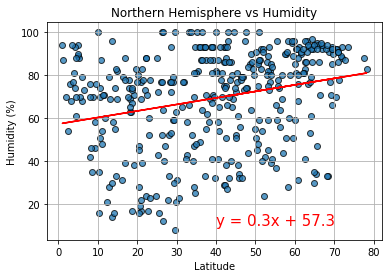

In [35]:
#Northern Hemisphere - Humidity (%) vs. Latitude

#Plotting with pyplot
#Setting variables for x-axis and y-axis
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']


#Graphing and showing Lineplot
plt.scatter(x_values,y_values, marker="o", edgecolors="black", alpha=0.75)

#Formatting title and axis labels
plt.title("Northern Hemisphere vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

#Adding the linear regression equation and line to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Print r square value
print(f"The r value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")

plt.savefig(f"output_data/fig7.png")
plt.show()


The r value is: 0.24686518653533285
The r-squared value is: 0.060942420323124684


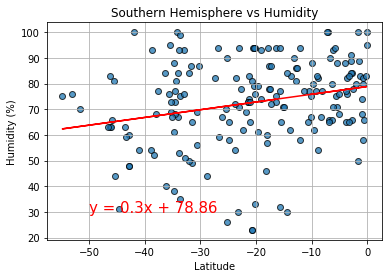

In [36]:
#Southern Hemisphere - Humidity (%) vs. Latitude

#Plotting with pyplot
#Setting variables for x-axis and y-axis
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']

#Graphing and showing Lineplot
plt.scatter(x_values,y_values, marker="o", edgecolors="black", alpha=0.75)

#Formatting title and axis labels
plt.title("Southern Hemisphere vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

#Adding the linear regression equation and line to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

# Print r square value
print(f"The r value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")

plt.savefig(f"output_data/fig8.png")
plt.show()

The r value is: 0.21336100476125675
The r-squared value is: 0.045522918352733026


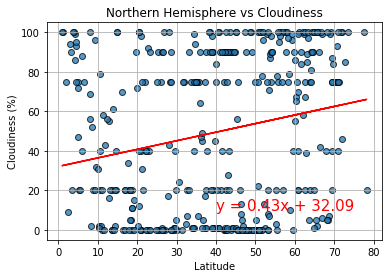

In [37]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude

#Plotting with pyplot
#Setting variables for x-axis and y-axis
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']


#Graphing and showing Lineplot
plt.scatter(x_values,y_values, marker="o", edgecolors="black", alpha=0.75)

#Formatting title and axis labels
plt.title("Northern Hemisphere vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

#Adding the linear regression equation and line to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Print r square value
print(f"The r value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")

plt.savefig(f"output_data/fig9.png")
plt.show()


The r value is: 0.33780652090793795
The r-squared value is: 0.11411324556792511


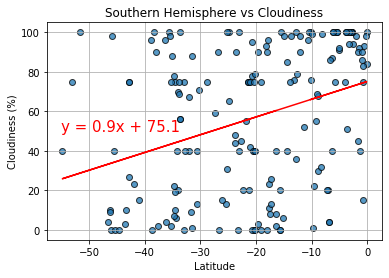

In [38]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude

#Plotting with pyplot
#Setting variables for x-axis and y-axis
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']


#Graphing and showing Lineplot
plt.scatter(x_values,y_values, marker="o", edgecolors="black", alpha=0.75)

#Formatting title and axis labels
plt.title("Southern Hemisphere vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

#Adding the linear regression equation and line to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")

# Print r square value
print(f"The r value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")

plt.savefig(f"output_data/fig10.png")
plt.show()

The r value is: 0.28862432005286154
The r-squared value is: 0.08330399812597665


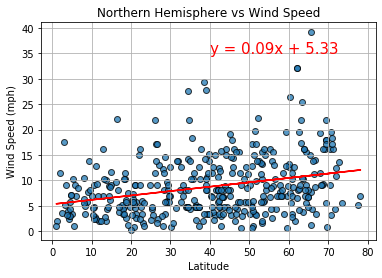

In [39]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude

#Plotting with pyplot
#Setting variables for x-axis and y-axis
x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed']


#Graphing and showing Lineplot
plt.scatter(x_values,y_values, marker="o", edgecolors="black", alpha=0.75)

#Formatting title and axis labels
plt.title("Northern Hemisphere vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

#Adding the linear regression equation and line to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,35),fontsize=15,color="red")

# Print r square value
print(f"The r value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")

plt.savefig(f"output_data/fig11.png")
plt.show()


The r value is: -0.2849146917865954
The r-squared value is: 0.08117638159585065


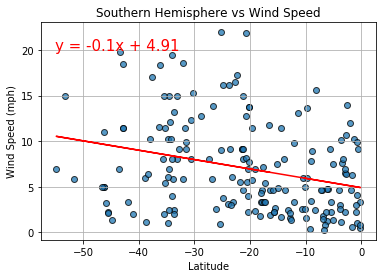

In [40]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude

#Plotting with pyplot
#Setting variables for x-axis and y-axis
x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed']


#Graphing and showing Lineplot
plt.scatter(x_values,y_values, marker="o", edgecolors="black", alpha=0.75)

#Formatting title and axis labels
plt.title("Southern Hemisphere vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

#Adding the linear regression equation and line to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

# Print r square value
print(f"The r value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")

plt.savefig(f"output_data/fig12.png")
plt.show()

Correlation Analysis

Northern and Southern Hemisphere - Temperature (F) vs. Latitude
There is a strong to moderate correlation between Latitude coordinate and Temperature.
The closer to the equator(0°) the higher the temperature, the further away from the equator
temperature decreases.

Northern and Southern Hemisphere - Humidity (%) vs. Latitude
There was a weak to no correlation between Latitude coordinate and Humidity.

Northern and Southern Hemisphere - Cloudiness (%) vs. Latitude
There was a weak to no correlation between Latitude coordinate and Cloudiness.
However, there are pocket areas where there were a maximim percent of cloudiness between 0° to -20° in the Southern Hemisphere and 60° to 70° in the Northern Hemisphere.

Northern and Southern Hemisphere - Wind Speed (mph) vs. Latitude
There was a weak to no correlation between Latitude coordinate and Wind Speed.
However, there was an outlier that had the maximum wind speed which was Lakselv, Norway at around 70° latitude for the random data set that included this data point.